In [1]:
#Predicting salary of new joiner

### Task1 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

In [3]:
df=pd.read_csv("DS2_C6_S1_Income_Data_Challenge.csv")
df.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [4]:
dfc=df.copy()

In [5]:
df.shape

(32561, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Gender          32561 non-null  object
 9   Capital_Gain    32561 non-null  int64 
 10  Capital_Loss    32561 non-null  int64 
 11  Hours_Per_Week  32561 non-null  int64 
 12  Native_Country  32561 non-null  object
 13  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [7]:
df.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income_Bracket'],
      dtype='object')

### Task2 

In [9]:
#since most values of capital loss and gain are 0, dropping them
df.drop(["Capital_Gain","Capital_Loss"],inplace=True,axis=1)

In [10]:
#checking for null& noise in dataset
c=df.select_dtypes(include="object").columns.to_list()
for i in c:
    print("---------")
    print(df[i].value_counts())
    print("---------")

---------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WorkClass, dtype: int64
---------
---------
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
---------
---------
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_Status, dtype: int64
---------
---------


In [11]:
#removing " ?" from our dataset
for i in c:
    for j in df[i]:
        if j==" ?":
            df[i]=df[i].replace(" ?",df[i].mode()[0])
            break

In [12]:
#label encoder
for i in c:
    df[i]=df[i].astype("category")
for i in c:
    df[i]=LabelEncoder().fit_transform(df[i])

<AxesSubplot:>

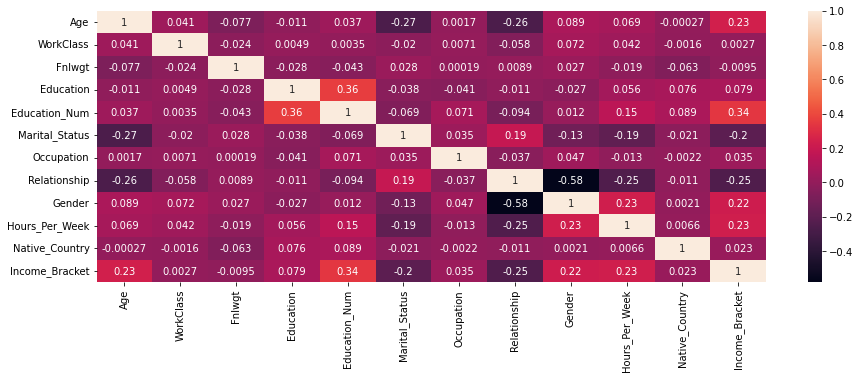

In [13]:
#correlation matrix
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

In [14]:
#income bracket is our target variable
#wrt target education num,relationship,age,hours per week,gender has high correlation. so considering them for modelling

In [15]:
#Scaling using standard scaler

In [16]:
scaler=StandardScaler()

In [17]:
df1=df.iloc[:,:-1]
y=df["Income_Bracket"]

In [18]:
df=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
df["Income_Bracket"]=y

In [19]:
df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Gender',
       'Hours_Per_Week', 'Native_Country', 'Income_Bracket'],
      dtype='object')

In [20]:
#separating x and y
x=df[["Education_Num","Relationship","Age","Gender","Hours_Per_Week"]]
y=df["Income_Bracket"]

In [21]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
#visualization

<AxesSubplot:xlabel='Income_Bracket', ylabel='count'>

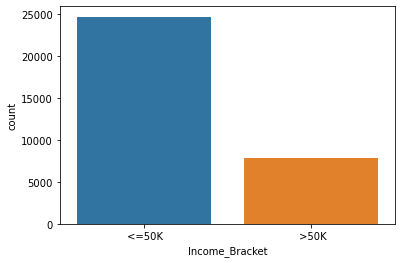

In [23]:
sns.countplot(data=dfc,x="Income_Bracket")

In [24]:
#maximum people belongs to <=50k income bracket

<AxesSubplot:xlabel='Education_Num', ylabel='count'>

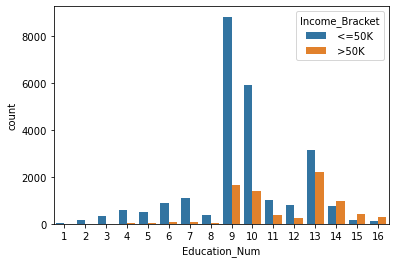

In [25]:
sns.countplot(data=dfc,x="Education_Num",hue="Income_Bracket")

In [26]:
#Education number 13 has high count of high salary bracket

<AxesSubplot:xlabel='Gender', ylabel='count'>

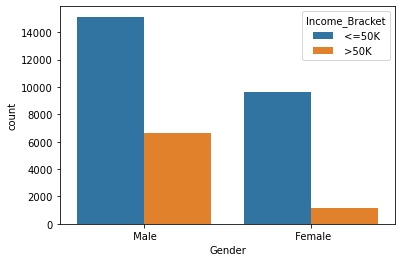

In [27]:
sns.countplot(data=dfc,x="Gender",hue="Income_Bracket")

In [28]:
#Males have majority in >50k salary bracket

<AxesSubplot:xlabel='Relationship', ylabel='count'>

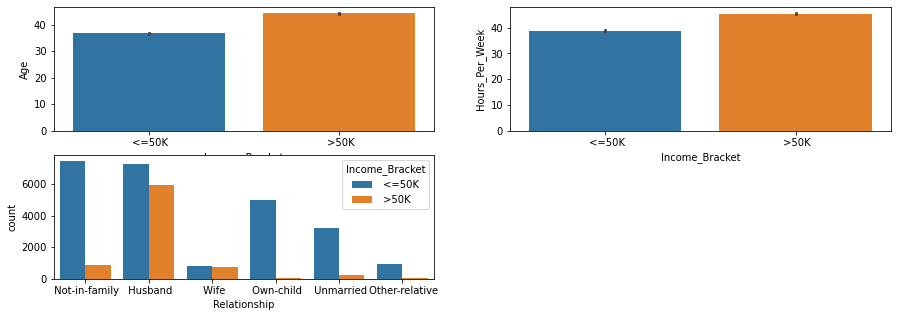

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(221)
sns.barplot(data=dfc,y="Age",x="Income_Bracket")
plt.subplot(222)
sns.barplot(data=dfc,y="Hours_Per_Week",x="Income_Bracket")
plt.subplot(223)
sns.countplot(data=dfc,x="Relationship",hue="Income_Bracket")


In [30]:
#mean age is higher in >50k income bracket
#hours per week of >50k is higher
#Husband category has more number of >50k people

### Task3

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
#choosing k based on less error rate
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test).ravel()
    error.append(np.mean(pred != (y_test)))

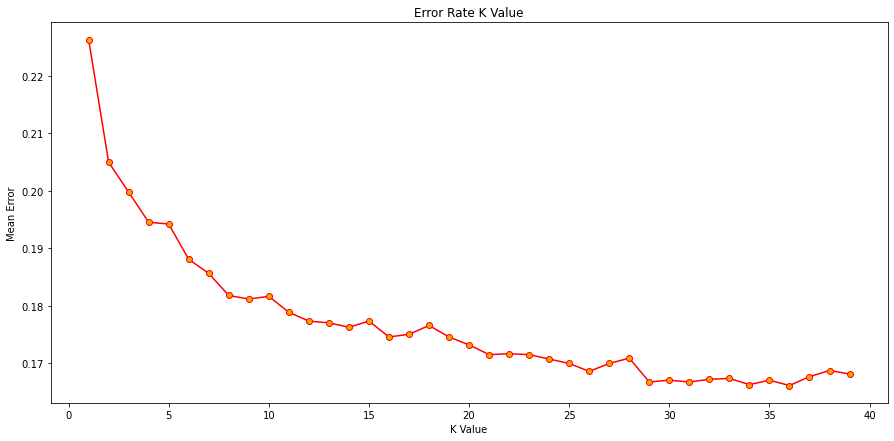

In [33]:
plt.figure(figsize=(15,7))
plt.plot(range(1,40),error,marker="o",color="red",markerfacecolor="orange")
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [ ]:
#here chosing k as 21 because it started stabilzing after that

In [34]:
#building model based on chosen k
model=KNeighborsClassifier(n_neighbors=21).fit(x_train,y_train)

In [35]:
y_pred=model.predict(x_test)

### Task4

In [36]:
#Model Evaluation

In [37]:
#test accuracy
model.score(x_test,y_test)

0.8284968524489482

In [38]:
#train accuracy
model.score(x_train,y_train)

0.8377226658476659

In [39]:
#y actual vs predicted
dfy=pd.DataFrame({"actual":y_test,"predicted":y_pred})
dfy

,actual,predicted
14160,0,0
27048,0,1
28868,1,1
5667,0,0
7827,0,0
...,...,...
1338,0,0
24534,1,1
18080,1,1
10354,0,0


In [40]:
#model evaluation metrics
#accuracy
accuracy_score(y_test,y_pred)

0.8284968524489482

In [41]:
#precision
precision_score(y_test,y_pred)

0.6770670826833073

In [42]:
#recall score
recall_score(y_test,y_pred)

0.5525143220878421

In [43]:
#f1 score
f1_score(y_test,y_pred)

0.6084822993340343

In [44]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[4528,  414],
       [ 703,  868]], dtype=int64)

In [45]:
#After tuning k we got model of accuracy of around 83%.
#So our model is a good model